In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 26kB/s 


# MNIST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random 
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


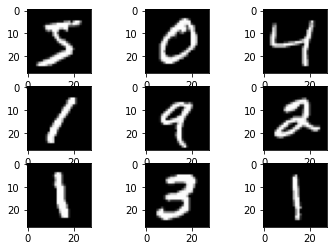

In [ ]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
trainX = trainX/255
testX = testX/255

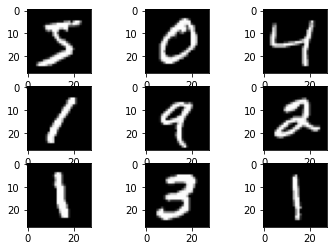

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_mnist = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3562 - accuracy: 0.9020 - val_loss: 0.1942 - val_accuracy: 0.9438
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1642 - accuracy: 0.9536 - val_loss: 0.1354 - val_accuracy: 0.9621
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1173 - accuracy: 0.9666 - val_loss: 0.1123 - val_accuracy: 0.9674
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0913 - accuracy: 0.9738 - val_loss: 0.0968 - val_accuracy: 0.9708
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0741 - accuracy: 0.9789 - val_loss: 0.0829 - val_accuracy: 0.9753
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9820 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0526 - accuracy: 0.9846 - val_loss: 0.0764 - val_accuracy: 0.9766
Epoch 

# MNIST ACCURACY LOSS

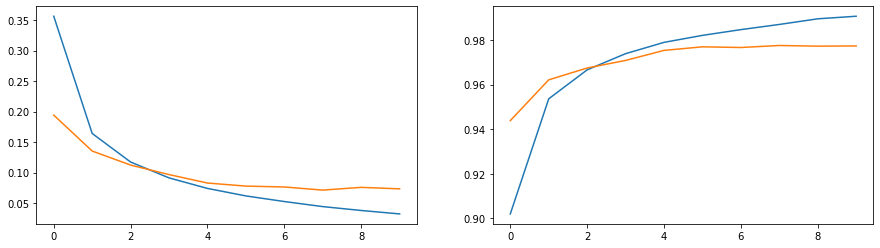

In [ ]:
gra, fig = plt.subplots(1, 2,figsize=(15,4))

fig[0].plot(history_mnist.history['loss'])
fig[0].plot(history_mnist.history['val_loss'])
# fig[0].set_title['loss']

fig[1].plot(history_mnist.history['accuracy'])
fig[1].plot(history_mnist.history['val_accuracy'])
# fig[1].set_title['loss']

In [ ]:
loss, accuracy = model.evaluate(testX, testy)
print("Validation Loss", loss)
print("Validation Accuracy", accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9773
Validation Loss 0.07338631898164749
Validation Accuracy 97.72999882698059


In [ ]:
loss, accuracy = model.evaluate(trainX, trainy)
print("Training Loss", loss)
print("Training Accuracy", accuracy*100)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0273 - accuracy: 0.9927
Training Loss 0.02727797068655491
Training Accuracy 99.26666617393494


CIFAR10

In [ ]:
(trainXC, trainyC), (testXC, testyC) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


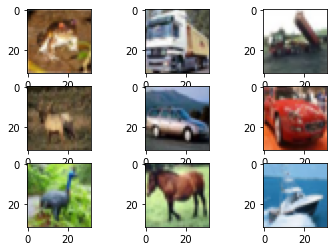

In [ ]:
print('Train: X=%s, y=%s' % (trainXC.shape, trainyC.shape))
print('Test: X=%s, y=%s' % (testXC.shape, testyC.shape))

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainXC[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
trainXC = trainXC/255
testXC = testXC/255

In [ ]:
model_cifar_dense = tf.keras.models.Sequential()
model_cifar_dense.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model_cifar_dense.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu))
model_cifar_dense.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
model_cifar_dense.summary()

model_cifar_dense.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_cifar_dense = model_cifar_dense.fit(trainXC, trainyC, validation_data=(testXC, testyC), epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 3s 8ms/step - loss: 1.9249 - accuracy: 0.3143 - val_loss: 1.7961 - val_accuracy: 0.3627
Epoch 2/10
391/391 [==============================] - 3s 8ms/step - loss: 1.7721 - accuracy: 0.3755 - val_loss: 1.7344 - val_accuracy: 0.3838
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.7052 - accuracy: 0.3979 - val_loss: 1.6694 - val_accuracy: 0.4041
Epoch 4/10
391/391 [==============================] - 3s 8ms/step - loss: 1.6519 - accuracy: 0.4134 - val_loss: 1.6675 - val_accuracy: 0.4054
Epoch 5/10
391/391 [==============================] - 3s 8ms/step - loss: 1.6253 - accuracy: 0.4244 - val_loss: 1.6482 - val_accuracy: 0.4210
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 1.5957 - accuracy: 0.4360 - val_loss: 1.5920 - val_accuracy: 0.4382
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 1.5791 - accuracy: 0.4417 - val_loss: 1.5780 - val_accuracy: 0.4449
Epoch 

# CIFAR10 LOSS ACCURACY

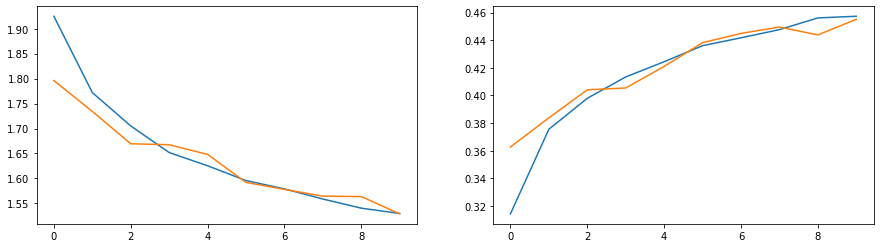

In [ ]:
gra, fig = plt.subplots(1, 2,figsize=(15,4))

fig[0].plot(history_cifar_dense.history['loss'])
fig[0].plot(history_cifar_dense.history['val_loss'])
# fig[0].set_title['loss']

fig[1].plot(history_cifar_dense.history['accuracy'])
fig[1].plot(history_cifar_dense.history['val_accuracy'])
# fig[1].set_title['loss']

# CNN CIFAR10

In [ ]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation=tf.keras.activations.relu, input_shape=(32,32,3)))
# model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation=tf.keras.activations.relu))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
# model.summary()

# input_shape = 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu, input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))

In [ ]:
!pip install -q pyyaml h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
# Folders for Model and Training History
os.makedirs("drive/My Drive/Models",exist_ok=True)
os.makedirs("drive/My Drive/Logs",exist_ok=True)

path_to_model="drive/My Drive/Models"
path_to_logs = "drive/My Drive/Logs"

In [ ]:

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/CNN_CIFAR10_new.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True,)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history_cifar = model.fit(trainXC, trainyC, validation_data=(testXC, testyC), epochs=10, batch_size=128, callbacks=[checkpointer])

Epoch 1/10
391/391 [==============================] - ETA: 0s - loss: 1.9804 - accuracy: 0.4809
Epoch 00001: val_accuracy improved from 0.44560 to 0.51630, saving model to drive/My Drive/Models/CNN_CIFAR10_new.h5
391/391 [==============================] - 44s 113ms/step - loss: 1.9804 - accuracy: 0.4809 - val_loss: 1.9459 - val_accuracy: 0.5163
Epoch 2/10
391/391 [==============================] - ETA: 0s - loss: 1.9309 - accuracy: 0.5321
Epoch 00002: val_accuracy improved from 0.51630 to 0.54010, saving model to drive/My Drive/Models/CNN_CIFAR10_new.h5
391/391 [==============================] - 44s 113ms/step - loss: 1.9309 - accuracy: 0.5321 - val_loss: 1.9209 - val_accuracy: 0.5401
Epoch 3/10
391/391 [==============================] - ETA: 0s - loss: 1.8974 - accuracy: 0.5659
Epoch 00003: val_accuracy improved from 0.54010 to 0.57950, saving model to drive/My Drive/Models/CNN_CIFAR10_new.h5
391/391 [==============================] - 44s 112ms/step - loss: 1.8974 - accuracy: 0.5659 -

#CNN CIFAR10 LOSS AND ACCURACY


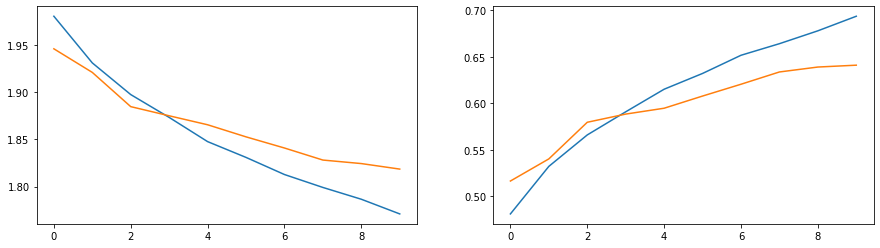

In [ ]:
gra, fig = plt.subplots(1, 2,figsize=(15,4))

fig[0].plot(history_cifar.history['loss'],label='Training Loss')
fig[0].plot(history_cifar.history['val_loss'],label='Validation Loss')

fig[1].plot(history_cifar.history['accuracy'],label='Training Loss')
fig[1].plot(history_cifar.history['val_accuracy'],label='Validation Loss')

In [ ]:
# model.save('/content/model')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/model/assets


In [ ]:
# model_name = 'CNN_CIFAR10'
# model_l = tf.keras.models.Sequential()
# model_l.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation=tf.keras.activations.relu, input_shape=(32,32,3)))
# model_l.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation=tf.keras.activations.relu))
# model_l.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model_l.add(tf.keras.layers.Flatten())
# model_l.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
# model_l.summary()
# model_l.compile()

# model_l.load_weights(filepath=f"{path_to_model}/{model_name}.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
Total params: 82,986
Trainable params: 82,986
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_l.evaluate(trainXC,trainyC)

1563/1563 [==============================] - 1s 893us/step - loss: 0.0000e+00


0.0

In [ ]:
from tensorflow import keras
re = keras.models.load_model('/content/model')


In [ ]:
re.evaluate(testXC,testyC)

313/313 [==============================] - 8s 26ms/step - loss: 2.0210 - accuracy: 0.0983


[2.0209951400756836, 0.09830000251531601]

# Loading CNN Model


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Models/CNN_CIFAR10.h5')

In [ ]:
model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                62730     
Total params: 82,986
Trainable params: 82,986
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(trainXC,trainyC)

1563/1563 [==============================] - 40s 26ms/step - loss: 2.0176 - accuracy: 0.1021


[2.0175957679748535, 0.10211999714374542]

# WEBAPP DONT USE THIS


In [ ]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.10-cp36-none-any.whl size=16378 sha256=a83ef624f5b7ee244e961fa20585239eb6ced36acec863439671526a4cfa5b82
  Stored in directory: /root/.cache/pip/wheels/0d/7f/06/e8079dd6f80eb6683fac47c4e1cb720b61cd82d6e4c13d87a5
Successfully built pyngrok


In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.2MB 7.6MB/s 
     |████████████████████████████████| 4.4MB 48.9MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
     |████████████████████████████████| 112kB 56.6MB/s 
     |████████████████████████████████| 122kB 56.0MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=e6a0fea480da8c0f7a1bba1b461f1e5be2a82d8681679ff8e4d7c6ac1a2d6fc9
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=e1ff1937a9fad1f6b5ed68d182c6701126202b7f23e37b470d4d7da9b5448ced
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=f3fd697ba1f06f828d551c9b7011091c74b56d797e6aa721c6e1d93a895ba64e
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image , ImageOps
import cv2 
import numpy as np

labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
  
st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():
  
  model = tf.keras.models.load_model('/content/drive/My Drive/Models/CNN_CIFAR10.h5')
  return model

model = lm()

st.write("""
  # Cifar 10 Clasifier
""")
file = st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])

def import_and_predict(image_data,model):


  size=(32,32)
  img = ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img = np.asarray(img)
  img = img[np.newaxis,...]
  l = np.argmax(model.predict(img))
  i  = labels[l]
  return i

if file is None:
  st.text("Pls upload image")
else:
  image = Image.open(file)
  st.image(image,use_column_width=True)
  p = import_and_predict(image , model)
  # p = 'hello'
  st.success(str(p))

Overwriting app.py


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-09-01 04:25:06--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.229.170.137, 3.225.89.236, 3.90.94.177, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.229.170.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  13.9MB/s    in 0.9s    

2020-09-01 04:25:07 (13.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [ ]:
!unzip /content/ngrok-stable-linux-amd64.zip

Archive:  /content/ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 1ggW0JDWxHydV1oo7CbUQANweuD_6fZF1L73i7g4rKSorCtbz

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

t=2020-09-01T04:30:04+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=b6f66e2c9eb9a743 err="Your account may not run more than 4 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\n[https://efe518eccefc.ngrok.io http://efe518eccefc.ngrok.io http://55c153e94984.ngrok.io https://55c153e94984.ngrok.io]\n\r\n\r\nERR_NGROK_324\r\n"



PyngrokNgrokHTTPError: ignored